In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
#all note names in instrument directories
noteNames = 'C Cs D Ds E F Fs G Gs A As B'.split(' ') 

def name_to_MIDI(note):
	return (noteNames.index(note[:-1]))+(int(note[-1])+1)*12

def name_to_freq(note):
	return MIDI_to_freq(name_to_MIDI(note))

#convert MIDI note to a frequency
def MIDI_to_freq(n):
	return 440 * pow(2.0,(n-69)/12.0)

In [151]:
cents = 200
def harmonic_detector(FFT, numHarm, rec):
	harmonics = np.zeros(numHarm)
	for i in range(numHarm):
		#get the current peak
		curr_max = np.argmax(FFT)
		low_idx  = int(pow(2,-cents/1200.)*curr_max)
		high_idx = int(pow(2,cents/1200.)*curr_max)
		#exclude in and around current peak in future searches
		FFT[low_idx:high_idx] = 0
		#the harmonic is too high to be detected never too low
		harmonics[i] = curr_max
	#must resize harmonics because there are more samples with more Rec_secs
	return harmonics / rec

In [152]:
chunk = pd.read_csv('philharmonia_signals.csv',nrows=50,header=None).values
header = chunk[0]
header

array([nan, 'segment', 'instrument', ..., 0.18571400000000002,
       0.18573699999999999, 0.18575999999999998], dtype=object)

In [153]:
data = chunk[1:]
data

array([[0.0, '0', 'bassoon', ..., -345.0, -691.0, -1038.0],
       [1.0, '1', 'bassoon', ..., -711.0, -1077.0, -1437.0],
       [2.0, '2', 'bassoon', ..., -2790.0, -3113.0, -3437.0],
       ...,
       [46.0, '24', 'bassoon', ..., -2124.0, -1953.0, -1786.0],
       [47.0, '25', 'bassoon', ..., 8.0, 7.0, 7.0],
       [48.0, '26', 'bassoon', ..., 0.0, 0.0, 0.0]], dtype=object)

In [154]:
notes = np.array([name_to_freq(notename) for notename in data[:,3]])
notes

array([220.        , 220.        , 220.        , 220.        ,
       220.        , 220.        , 220.        , 622.25396744,
       622.25396744, 622.25396744, 622.25396744, 622.25396744,
       622.25396744, 622.25396744, 622.25396744, 466.16376152,
       466.16376152, 466.16376152, 466.16376152, 466.16376152,
       466.16376152, 466.16376152, 261.6255653 , 261.6255653 ,
       261.6255653 , 261.6255653 , 261.6255653 , 261.6255653 ,
       261.6255653 , 261.6255653 , 261.6255653 , 261.6255653 ,
       261.6255653 , 261.6255653 , 261.6255653 , 261.6255653 ,
       261.6255653 , 261.6255653 , 261.6255653 , 261.6255653 ,
       261.6255653 , 261.6255653 , 261.6255653 , 261.6255653 ,
       261.6255653 , 261.6255653 , 261.6255653 , 261.6255653 ,
       261.6255653 ])

In [155]:
signal = data[:,7:]
signal

array([[0.0, 0.0, 0.0, ..., -345.0, -691.0, -1038.0],
       [-1386.0, -1729.0, -2072.0, ..., -711.0, -1077.0, -1437.0],
       [-1784.0, -2122.0, -2463.0, ..., -2790.0, -3113.0, -3437.0],
       ...,
       [3736.0, 3446.0, 3120.0, ..., -2124.0, -1953.0, -1786.0],
       [-1626.0, -1471.0, -1318.0, ..., 8.0, 7.0, 7.0],
       [7.0, 7.0, 7.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [156]:
FFT = np.abs(np.fft.rfft(signal,axis=1))
FFT

array([[5.78250000e+04, 5.40219833e+04, 1.94307535e+05, ...,
        6.16862309e+02, 5.84416539e+02, 6.77000000e+02],
       [4.86920000e+04, 8.05323516e+04, 1.77763699e+05, ...,
        1.75860940e+02, 1.91883729e+02, 2.88000000e+02],
       [1.83740000e+04, 7.22164921e+04, 7.41153806e+04, ...,
        1.01691195e+03, 1.03525805e+03, 1.05000000e+03],
       ...,
       [1.77120000e+04, 4.57963357e+04, 3.71978350e+04, ...,
        2.82023439e+03, 2.77216651e+03, 2.85200000e+03],
       [2.86210000e+04, 6.68953573e+04, 1.22140666e+05, ...,
        8.49090007e+02, 8.04703436e+02, 7.45000000e+02],
       [8.36000000e+02, 8.35665779e+02, 8.34663597e+02, ...,
        4.10634928e+00, 4.02690223e+00, 4.00000000e+00]])

In [157]:
rec = header[-1]
freq = np.arange(FFT.shape[1])/rec
freq

array([0.00000000e+00, 5.38329027e+00, 1.07665805e+01, ...,
       2.20391904e+04, 2.20445736e+04, 2.20499569e+04])

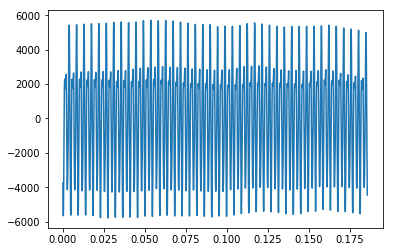

In [158]:
index = 3
plt.plot(header[7:],signal[index])
plt.show()

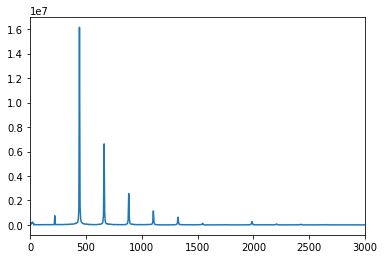

In [159]:
plt.plot(freq,FFT[index])
plt.xlim(0,3000)
plt.show()

In [160]:
harmonic_detector(FFT[index], 10, rec)

array([ 441.42980189,  662.14470284,  882.85960379, 1103.57450474,
        220.71490095, 1324.28940568, 1986.43410853,   21.53316107,
         21.53316107,   21.53316107])